
# Project: Movie Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movie Database(TMDb) sourced from Kaggle which contains about 10,000 movies and a myriad of variables is used in this analysis. The following variables are contained in the dataset:


1. **id** - identification number
2. **imdb_id** - movie database id
3. **popularity**  - numerical rating of movie popularity
4. **budget** - movie expenditure   
5. **revenue** - movie earnings
6. **original_title**  - movie name
7. **cast**    - main cast's names
8. **homepage** - movie webpage
9. **director** - name of movie director 
10. **tagline** - movie catch phrases
11. **overview**    - movie description
12. **runtime** - movie duration
13. **genres**  - movie thematic categorization
14. **production_companies** - companies who produced the movie  
15. **release_date** - movie release date 
16. **vote_count**  - total vote count
17. **vote_average** - average vote count  
18. **release_year**- movie release year
19. **budget_adj**  - movie expenditure (inflation adjusted)
20. **revenue_adj**- movie earnings (inflation adjusted)

## Questions of interest
Majority of the questions sought to be answered are about the movie directors.

1. Who are the top directors based on the most popular movies?
2. Who are the top directors based on the number of movies directed?
3. Which directors on average have the highest movie ratings?
4. Which directors on average have the highest earnings?
5. Do directors increase the popularity of their movies by increasing their budget?
6. Do directors increase the earnings of their movies by increasing their budget?


<a id='wrangling'></a>
## Data Wrangling and Cleaning

Important libraries are first imported and the data is loaded into a pandas data frame, not forgetting our all important magic line that serves to ensure that visualizations are directly rendered in the notebook. A few lines of the data are shown in order to have a look at the data. The types of variables, number of rows and columns, descriptive statistics of variables, number of missing variables, number of unique variables and duplicates are checked for in the data. The directors are of key importance to this analysis. In addition to dropping duplicate rows, rows with missing director names are dropped.

In [1]:
# import libraries and load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

In [2]:
# show first few lines of the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# check variables and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# number of rows and colums
df.shape

(10866, 21)

In [5]:
# description of variables
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# missing values for each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# drop rows with missing director names
df.dropna(subset='director', inplace=True)
df.director.isnull().sum()

0

In [8]:
# check number unique values
df.nunique()

id                      10821
imdb_id                 10815
popularity              10771
budget                    556
revenue                  4702
original_title          10528
cast                    10685
homepage                 2886
director                 5067
tagline                  7988
keywords                 8790
overview                10804
runtime                   246
genres                   2031
production_companies     7429
release_date             5891
vote_count               1289
vote_average               71
release_year               56
budget_adj               2611
revenue_adj              4839
dtype: int64

In [9]:
# check for duplicates
df.duplicated().sum()

1

In [10]:
# drop the duplicated data
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

Histograms of variables in the data set are displayed in order to get a look at the various distributions of the different variables in our data. The six questions posed initially are then addressed.

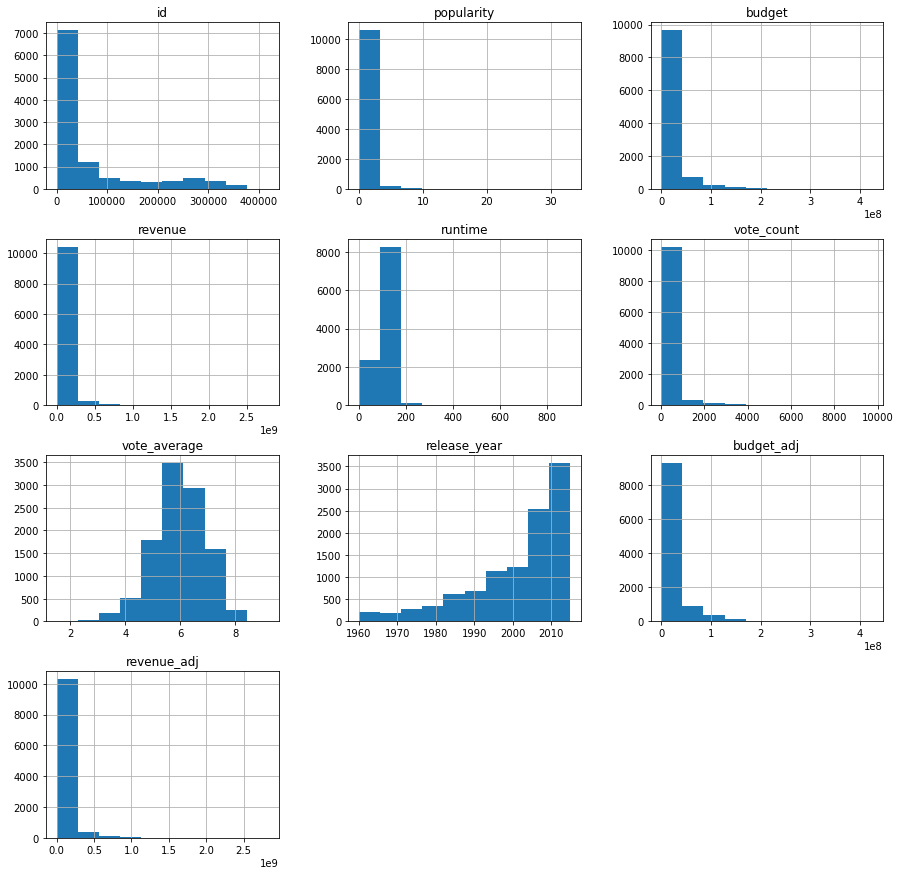

In [11]:
# display a histogram for variables in the dataset
df.hist(figsize=(15,15));

### Question 1
The first question is concerned with the top directors based on their most popular movies. Colin Trevorrow comes in first with Jurassic World, George Miller second with Mad Max: Fury Road and Christopher Nolan comes in third with Interstellar.

In [12]:
director_pop = df[['director','original_title', 'popularity']]
director_pop.sort_values(by='popularity', ascending=False, ignore_index=True).head(10)

,director,original_title,popularity
0,Colin Trevorrow,Jurassic World,32.985763
1,George Miller,Mad Max: Fury Road,28.419936
2,Christopher Nolan,Interstellar,24.949134
3,James Gunn,Guardians of the Galaxy,14.311205
4,Robert Schwentke,Insurgent,13.112507
5,Joe Russo|Anthony Russo,Captain America: The Winter Soldier,12.971027
6,George Lucas,Star Wars,12.037933
7,Chad Stahelski|David Leitch,John Wick,11.422751
8,J.J. Abrams,Star Wars: The Force Awakens,11.173104
9,Francis Lawrence,The Hunger Games: Mockingjay - Part 1,10.739009


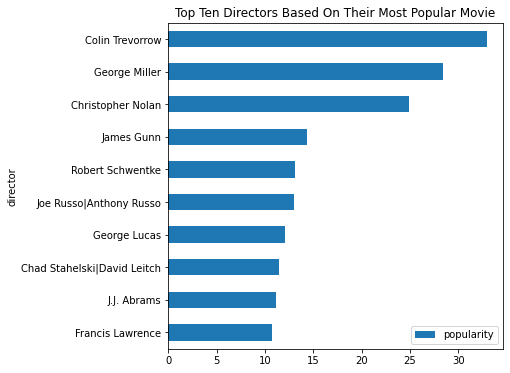

In [13]:
director_pop.sort_values(by='popularity',ascending=True,ignore_index=True).tail(10).set_index('director').plot(kind='barh',figsize=(6,6))
plt.title('Top Ten Directors Based On Their Most Popular Movie');

### Question 2
The second question asks about the top directors based on the number of movies they have directed. Woody Allen has by far directed the most movies with 45 movies in total. Clint Eastwood is second with 34 movies while Martin Scorsese and Steven Spielberg bracket at third with 29 movies.

In [14]:
df['director'].value_counts().head(10)

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Name: director, dtype: int64

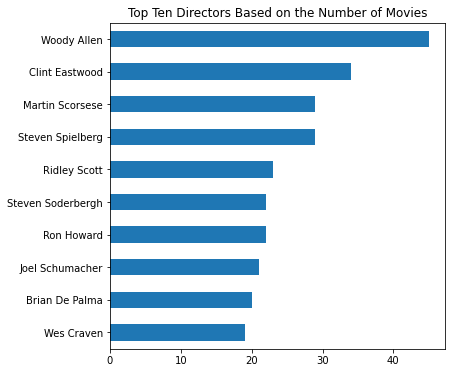

In [15]:
df['director'].value_counts(ascending=True).tail(10).plot(kind='barh', figsize=(6,6))
plt.title('Top Ten Directors Based on the Number of Movies');

### Question 3
The third question is about the quality of the movies directed. Which directors on average have the highest movie ratings? The findings are that Mark Cousins has the highest average movie ratings of 9.2, followed by Derek Frankowski with 8.8 and finally David Mallet with	8.7.

In [16]:
director_movie_ratings = df[['director', 'vote_average']].groupby('director').mean()
director_movie_ratings.sort_values(by='vote_average', ascending=False).head(10)

,vote_average
director,
Mark Cousins,9.2
Derek Frankowski,8.8
David Mallet,8.7
Martin Scorsese|Michael Henry Wilson,8.5
James Payne,8.5
Saul Swimmer,8.5
Curt Morgan,8.5
D.A. Pennebaker|David Dawkins|Chris Hegedus,8.4
Anthony Mandler,8.4


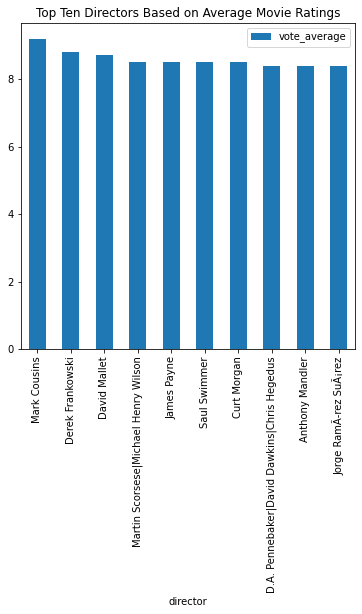

In [17]:
director_movie_ratings.sort_values(by='vote_average', ascending=False).head(10).plot(kind='bar', figsize=(6,6))
plt.title('Top Ten Directors Based on Average Movie Ratings');

### Question 4
The fourth question is about the director(s) who has the highest average earnings per movie. Kyle Balda & Pierre Coffin earn the highest on average at 1.16 billion dollars. This is followed by Lee Unkrich at 1.06 billion dollars and Andrew Adamson & Kelly Asbury & Conrad Vernon at 0.92 billion dollars.

In [18]:
director_earnings = df[['director', 'revenue']].groupby('director')
director_earnings.mean().sort_values(by='revenue', ascending=False).head(10)

,revenue
director,
Kyle Balda|Pierre Coffin,1.156731e+09
Lee Unkrich,1.063172e+09
Andrew Adamson|Kelly Asbury|Conrad Vernon,9.198388e+08
Andrew Stanton|Lee Unkrich,8.646260e+08
Pete Docter,8.537086e+08
David Yates,8.308591e+08
Chris Miller|Raman Hui,7.989582e+08
Roger Allers|Rob Minkoff,7.882418e+08
Colin Trevorrow,7.587683e+08


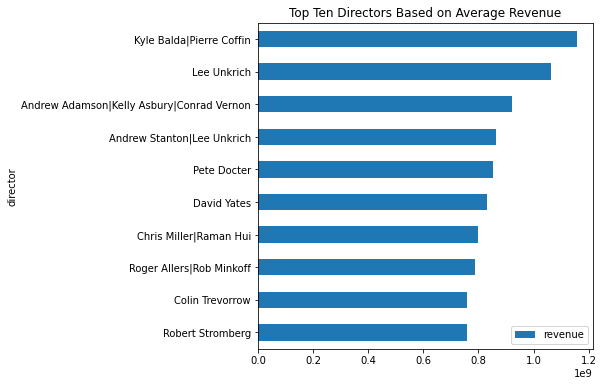

In [19]:
director_earnings.mean().sort_values(by='revenue', ascending=True).tail(10).plot(kind='barh', figsize=(6,6))
plt.title('Top Ten Directors Based on Average Revenue');

### Question 5
The fifth question asks about the correlation between popularity of movies and their associated budget. Do directors increase the popularity of their movies by spending more? There is no strong relationship between the two variables. The scatter diagram shows us that increasing the budget has no relationship with the popularity of a movie. However, to prove beyond doubt that there is no significant relationship between the two variables would require statistical testing, hence, we conclude by saying that the two variables seem to be uncorrelated.

In [20]:
df[['budget','popularity']].sort_values(by='popularity',ascending=False,ignore_index=True).head(10)

,budget,popularity
0,150000000,32.985763
1,150000000,28.419936
2,165000000,24.949134
3,170000000,14.311205
4,110000000,13.112507
5,170000000,12.971027
6,11000000,12.037933
7,20000000,11.422751
8,200000000,11.173104
9,125000000,10.739009


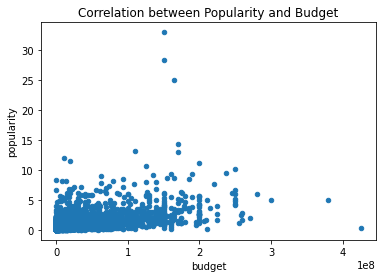

In [21]:
df.plot(x='budget', y='popularity',kind='scatter')
plt.title('Correlation between Popularity and Budget');

### Question 6
The sixth and final question is about the association between earnings and the budget. Do directors increase the earnings of their movies by increasing their budget? The scatter diagram shows there is only a weak positive relationship. Increasing the budget seems to increase earnings, however, statistical testing is required to prove this relationship. We conclude by saying that the two variables are only weakly correlated.


In [22]:
df[['budget','revenue']].sort_values(by='revenue',ascending=False,ignore_index=True).head(10)

,budget,revenue
0,237000000,2781505847
1,200000000,2068178225
2,200000000,1845034188
3,220000000,1519557910
4,150000000,1513528810
5,190000000,1506249360
6,280000000,1405035767
7,125000000,1327817822
8,150000000,1274219009
9,200000000,1215439994


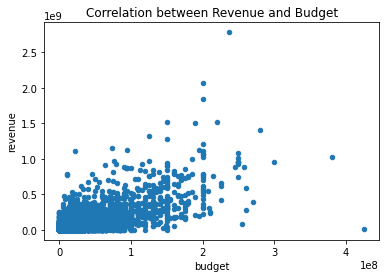

In [23]:
df.plot(x='budget', y='revenue',kind='scatter')
plt.title('Correlation between Revenue and Budget');

<a id='conclusions'></a>
## Conclusions

1. The top directors based on their most popular movies are Colin Trevorrow, George Miller and Christopher Nolan.
2. The top directors based on the number of movies they have directed are Woody Allen, Clint Eastwood, Martin Scorsese and Steven Spielberg.
3. The directors with the highest movie ratings are Mark Cousins, Derek Frankowski and David Mallet.
4. The directors who have the highest average earnings per movie are Kyle Balda & Pierre Coffin, Lee Unkrich, and Andrew Adamson & Kelly Asbury & Conrad Vernon.
5. Budget and popularity are not correlated.
6. Budget and revenue have a weak positive correlation.